## Intro



Imagine you want to sell real estate. You know its properties: how many rooms it has, how many cars fit in the garage, the total area build, its location, etc.

Now, the question is: what would be the best price for you to sell it, that is, how much is it really worth?

You can request an appraisal from a real estate agent (relying on her experience), or else...

...build a **Machine Learning** model, which, based on the properties and price of several other real estate, can **predict** an adequate price for your real estate.

To solve this problem, we can use one of the simplest and more important algorithms of machine learning: the **Linear Regression**.

______

To bring the idea home, we are going to use a [real estate prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

This dataset contains **79 features** (plus one id column), which are the characteristics of the listed real estate; and **1 target**, which is the price the property was actually sold for.

Since we have a target, we are working with a **supervisioned learning** problem.

For each feature's meaning, and the range of values it can take, check the link above.

**Let's read the dataset and begin to explore it!**

In [1]:
# import the main data analysis libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to hide warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/house-prices.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
nulls = df.isnull().sum()
nulls

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
nulls_pct = nulls/df.shape[0]
nulls_pct

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [9]:
nulls_pct[nulls_pct>0.5]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [10]:
nulls_pct[(nulls_pct > 0) & (nulls_pct<0.5)]

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

For now, we will not treat missing data, because we are going to use just one feature for the initial model.

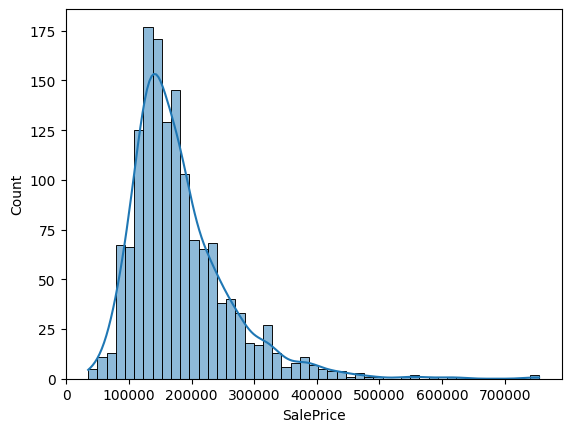

In [11]:
# SalePrice distribution
sns.histplot(data=df, x="SalePrice", kde=True);

In [12]:
df["SalePrice"].skew()

1.8828757597682129

Log distributions commonly decrease the skewness of biased samples:

In [13]:
df["Log_Price"] = np.log10(df["SalePrice"])

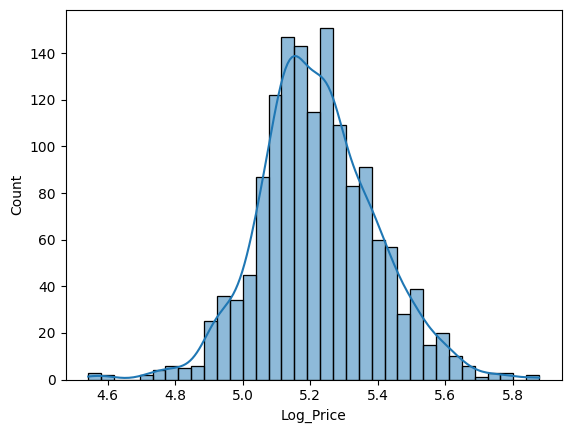

In [14]:
sns.histplot(data=df, x="Log_Price", kde=True);

In [15]:
df["Log_Price"].skew()

0.12133506220521131

It is clear that the distribution is skewed to the left. We will deal with this later.

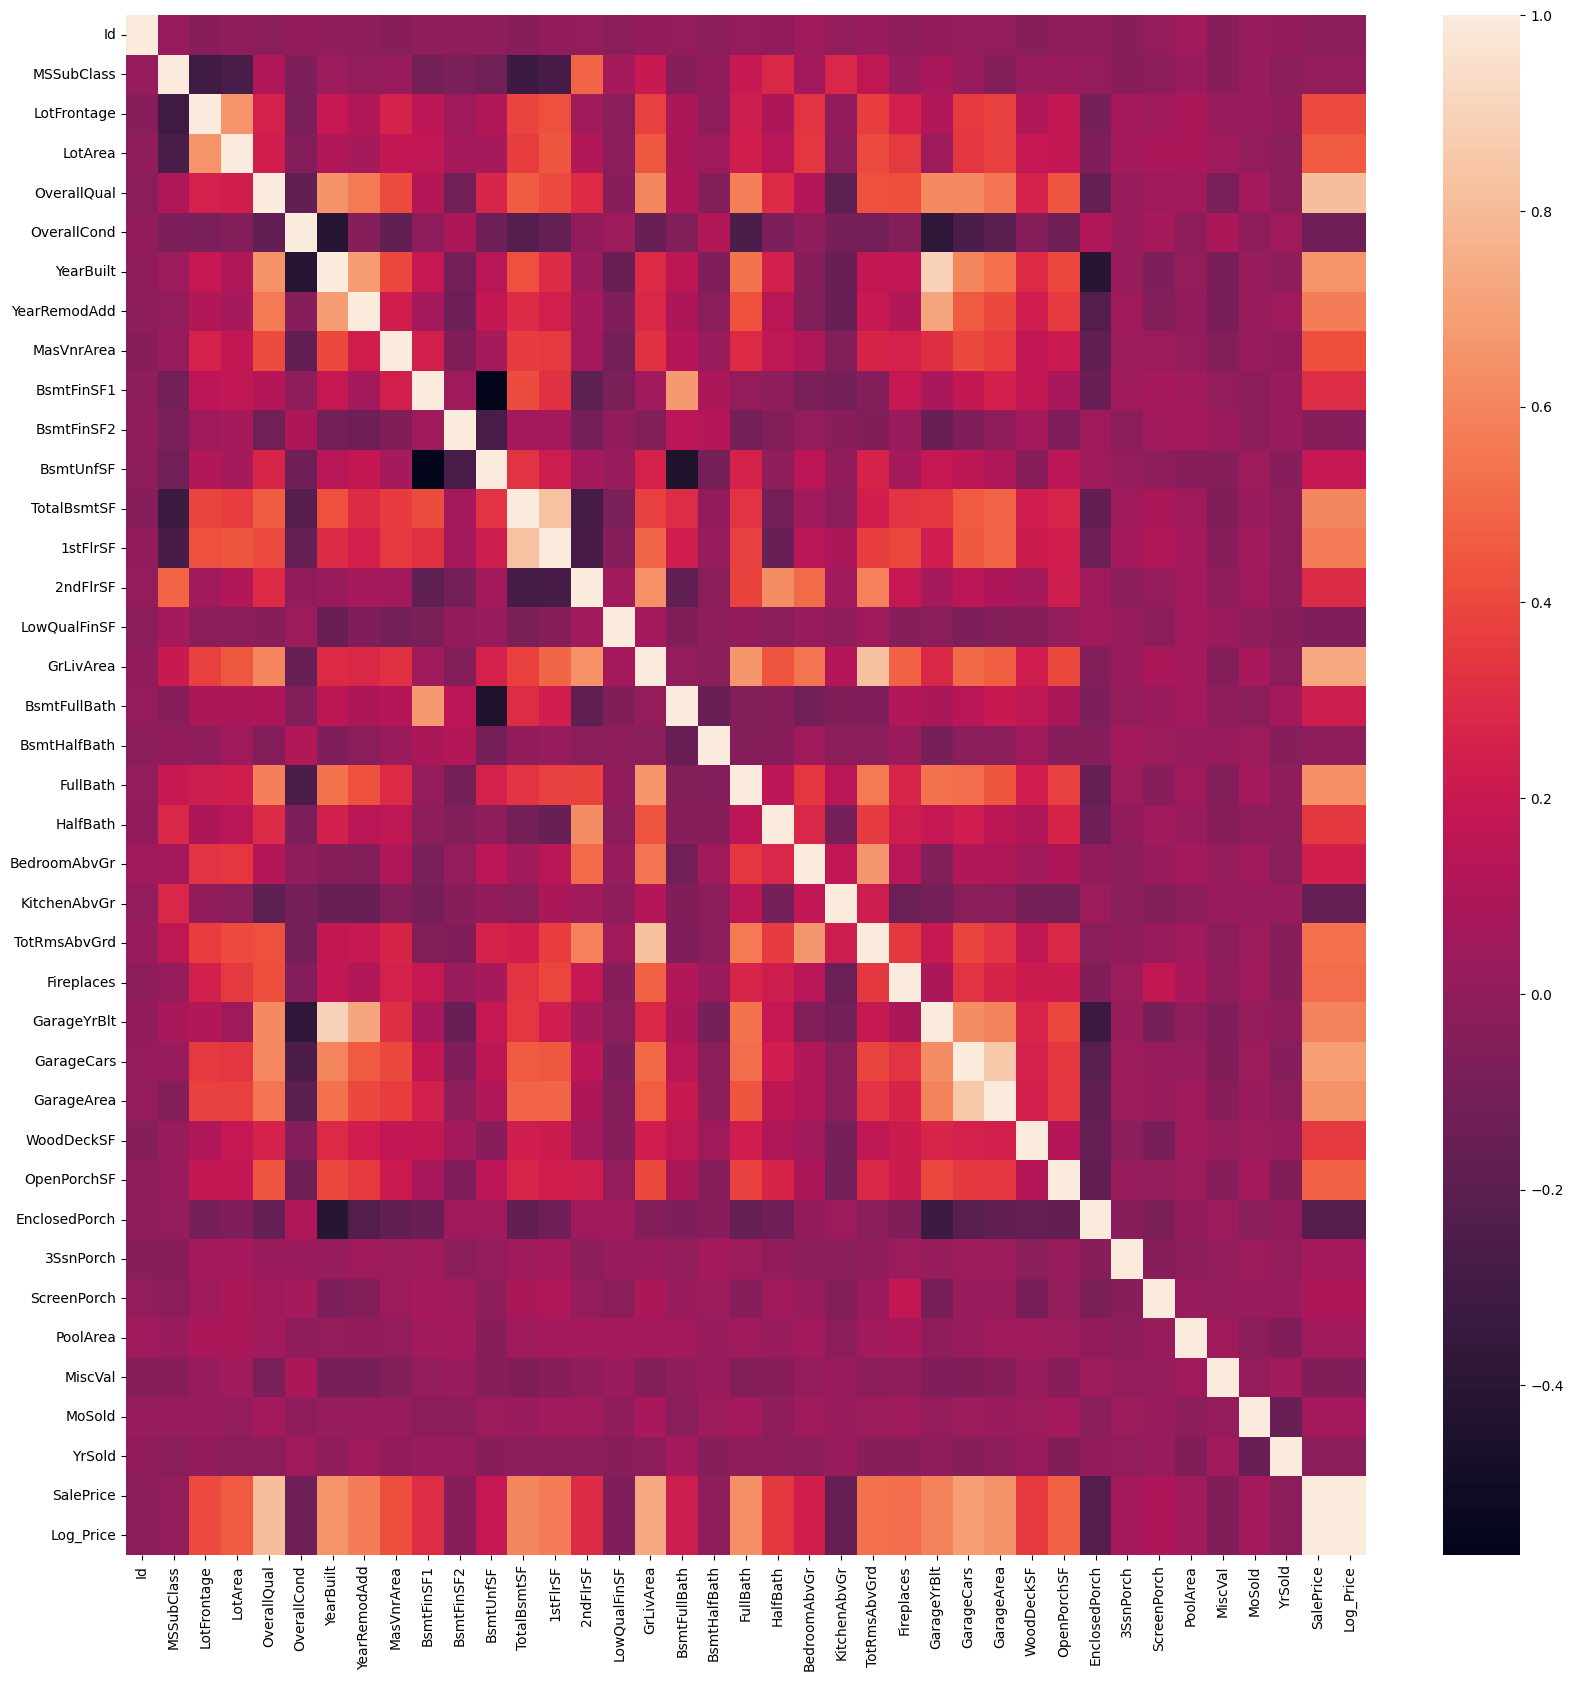

In [16]:
# correlation between variables
corr = df.corr(method="spearman")

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False);

In [17]:
corr["SalePrice"]

Id              -0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Log_Price   

In [18]:
# variables with high correlation with SalePrice (target)
cor_y = corr["SalePrice"].abs().sort_values(ascending=False)
cor_y

Log_Price        1.000000
SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF     0.067719
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
BsmtFinSF2       0.038806
YrSold           0.029899
Id               0.018546
BsmtHalfBath     0.012189
MSSubClass  

In [19]:
cor_y[cor_y > 0.7]

Log_Price      1.000000
SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
Name: SalePrice, dtype: float64

In [20]:
cor_y[cor_y > 0.7].index

Index(['Log_Price', 'SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

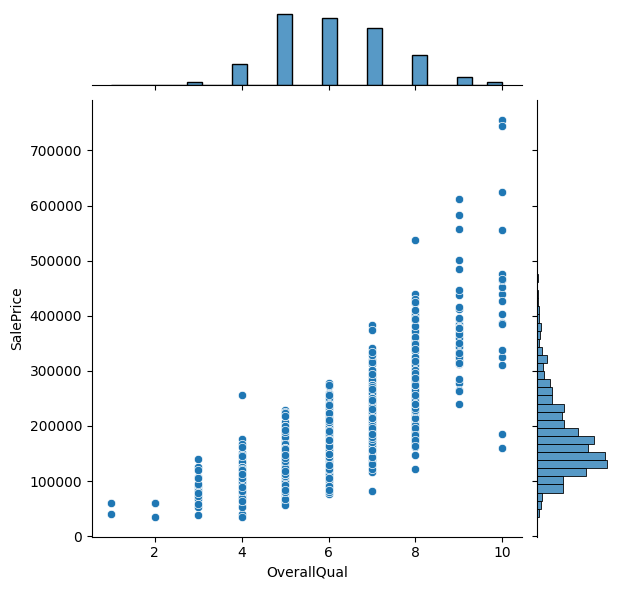

In [21]:
# explore the relationship between these variables and the target
sns.jointplot(data=df, x="OverallQual", y='SalePrice');

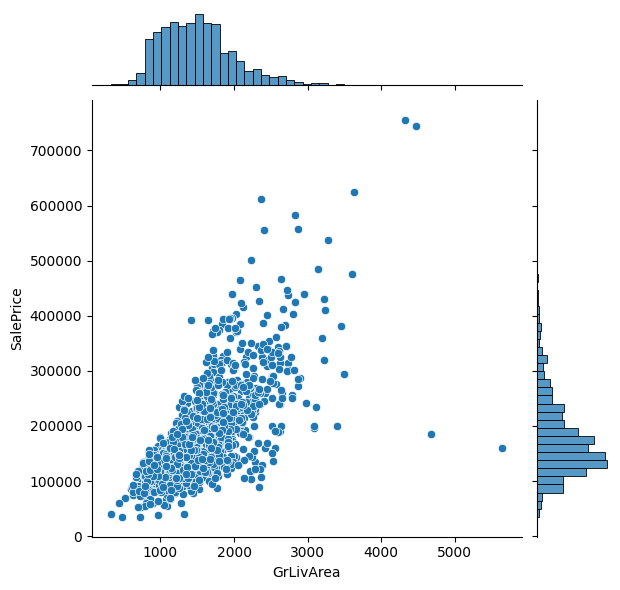

In [22]:
sns.jointplot(data=df, x="GrLivArea", y='SalePrice');

It seems that the variable "GrLivArea" is a strong candidate to **explain** the price of the houses, because we clearly see a correlation between the variables. But note that there are clearly two outliers...

In [23]:
df[~(df["GrLivArea"] > 4500)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.319106
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5.258877
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5.349278
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5.146128
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,5.243038
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,5.322219
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,5.425697
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,5.152670


In [24]:
df.query("not GrLivArea > 4500")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.319106
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5.258877
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5.349278
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5.146128
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,5.243038
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,5.322219
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,5.425697
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,5.152670


In [25]:
# identify and remove outliers
df = df[~(df["GrLivArea"] > 4500)]

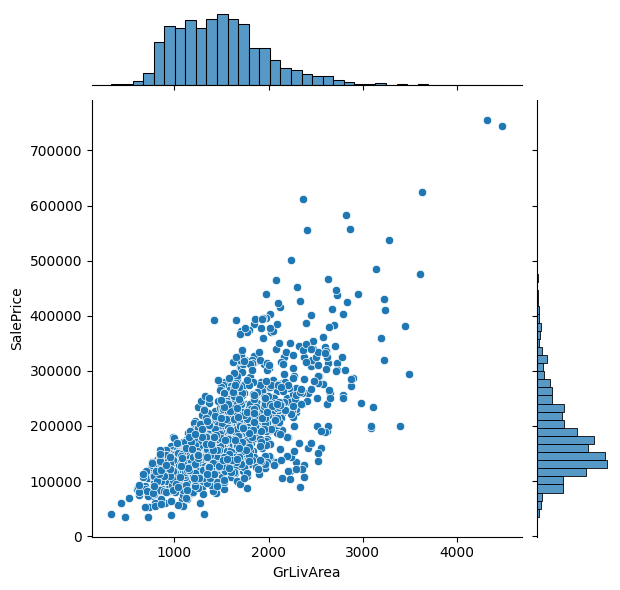

In [26]:
# plot the scatterplot again to check if the outliers are gone (regular price)
sns.jointplot(data=df, x="GrLivArea", y='SalePrice');

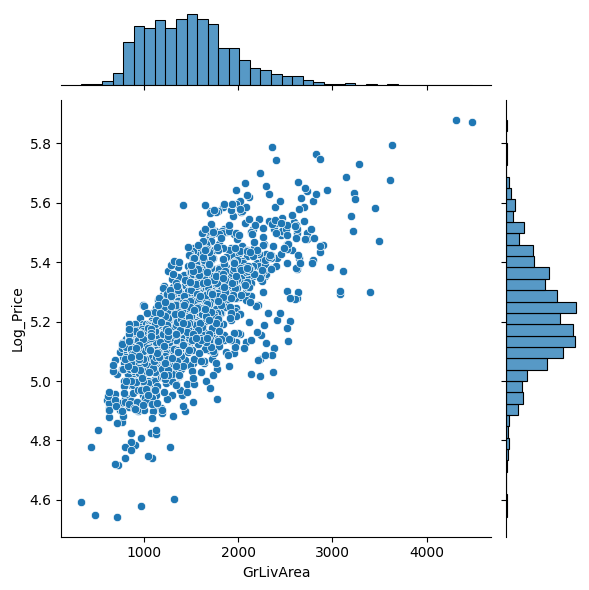

In [27]:
# plot the scatterplot again to check if the outliers are gone (log price)
sns.jointplot(data=df, x="GrLivArea", y='Log_Price');

## Simple linear regression

Despite some outliers, it seems quite appropriate that the points plotted above are described by a straight line, isn't it?

Or, better saying: **the variable GrLivArea seems to be linearly related to the target SalePrice!**

To model this relationship, let's get to know the **Simple Linear Regression** model.

As the name says, the **Simple Linear Regression** model will be **a straight line (linear polynomial)**, which best fits your data.

The **Simple Linear Regression** model will be a straight line that relates Y (the price of the house) and X (the attributes of the house).

If we use **only one attribute** (such as the built area), we have a **Simple Linear Regression**, and our model is:

$$ y = b_0 + b_1 X $$

In this case, the model has two coefficients to be determined: $b_0$ (intercept or linear coefficient) and $b_1$ (angular coefficient).

The equation above expresses the **functional form** of the set of hypotheses we will work with: linear functions, of a single variable. That is,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Or, in a more compact way:

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

is the set of hypotheses being considered, and the parameter vector is:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$

The **learning algorithm** of the estimator is used precisely to find the coefficients $b_0$ and $b_1$ (that is, the parameter vector) **that best fit the data**.

To do this, we can use the **least squares** method (OLS - ordinary least squares) or the **gradient descent**.

But we will not worry about the details of the training: we will use sklearn for that. Shall we start?

In [28]:
# set two variables, X and y, respectively the GrLiveArea feature array and the target
X = df["GrLivArea"]
y = df["SalePrice"]

In [29]:
X[:5]

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [30]:
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [31]:
# import the estimator class you want to train
from sklearn.linear_model import LinearRegression

In [32]:
# instantiate the estimator class, choosing the desired hyperparameters
reg_lin = LinearRegression()

In [33]:
# import the train_test_split function and use it to separate the data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X.shape, y.shape

((1458,), (1458,))

In [35]:
X_test.shape, y_test.shape

((292,), (292,))

In [36]:
X_train.shape, y_train.shape

((1166,), (1166,))

In [37]:
X_test.shape[0] / X.shape[0]

0.20027434842249658

Explaining the reshape:

The reshape is necessary because the sklearn library expects the data to be in a matrix format, where each column is a feature and each line is an observation. In our case, we have only one feature (GrLivArea), and therefore we have only one column. The number of lines is the number of observations, which is the same as the number of lines in the original dataset.

The -1, 1 in the reshape indicates that we want to reshape the data into a matrix with 1 column and as many lines as necessary, so that the number of elements is preserved.

In [38]:
X_train.shape

(1166,)

In [39]:
X_train.values.reshape(-1, 1).shape

(1166, 1)

In [40]:
X_train.values.reshape(-1, 1)

array([[1314],
       [1571],
       [1002],
       ...,
       [1052],
       [1039],
       [1530]])

In [41]:
# fit the model to the training data
reg_lin.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

Now that the model is trained, we can take a look at the coefficients that were found.

In [42]:
vars(reg_lin)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([118.6121988]),
 'rank_': 1,
 'singular_': array([17228.25869926]),
 'intercept_': 1562.0121909830486}

In [43]:
reg_lin.intercept_

1562.0121909830486

In [44]:
reg_lin.coef_[0]

118.61219879940971

How do we interpret this result?

Our final model is given by:

$$ y = \mathcal{M} = f_{H, \hat{\vec{b}}}(x) =  1562.01 + 118.61 \times \text{GrLiveArea}$$

That means that:

> By increasing the variable "GrLiveArea" by one unit, the price is increased by USD 118.6

> The minimum price to be paid, regardless of the built area, is USD 1562.01

We can visualize the trained model, in this case:

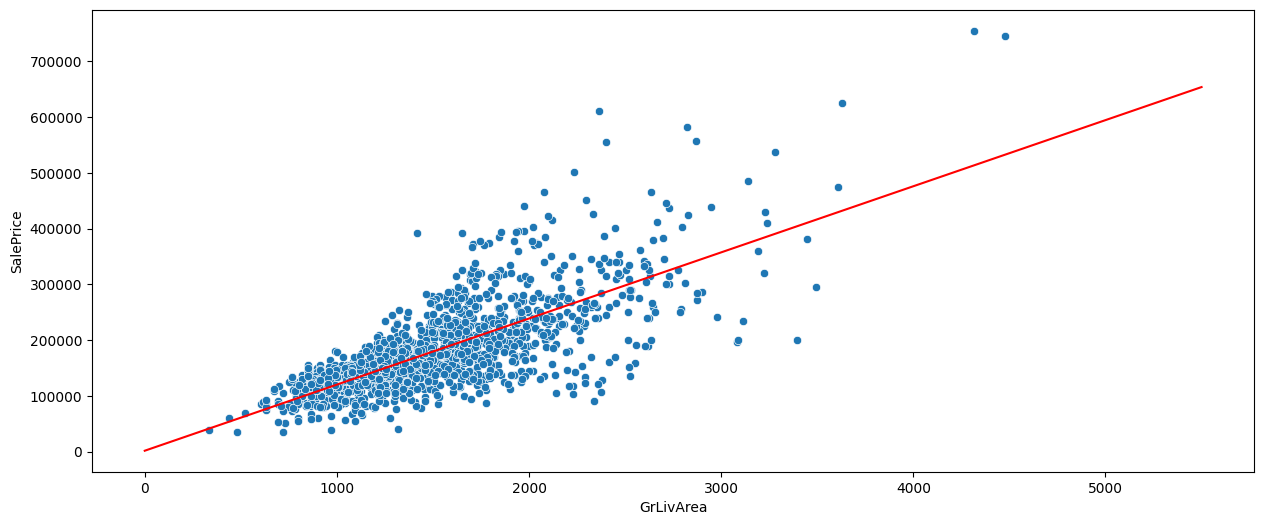

In [45]:
plt.figure(figsize=(15, 6))

# plot the scatterplot of the feature by the target
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

# plot a line with the intercept and slope found by the model
x = np.linspace(0, 5500, 10000)
y = reg_lin.intercept_ + reg_lin.coef_[0]*x
plt.plot(x, y, color="red");

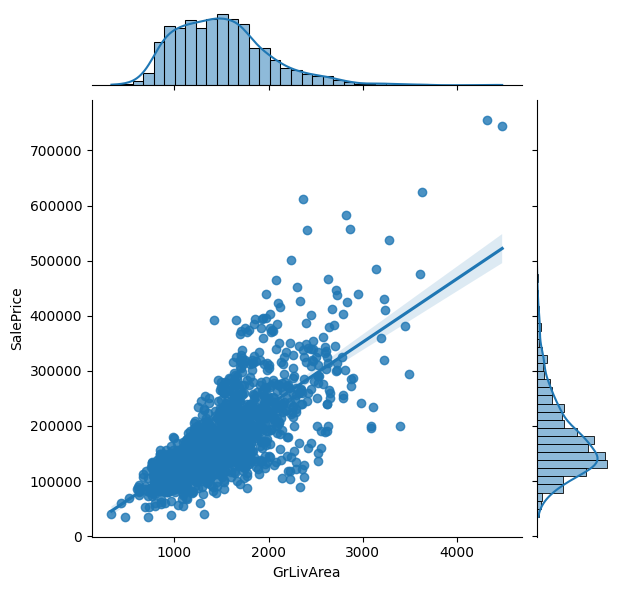

In [46]:
sns.jointplot(data=df, x="GrLivArea", y="SalePrice", kind="reg");

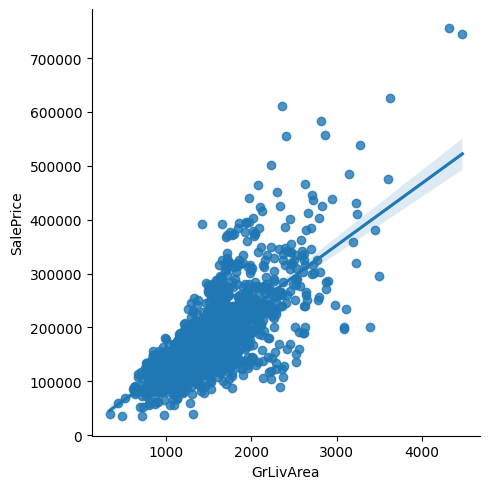

In [47]:
# it is possible to do the same with "sns.lmplot()", automatically
sns.lmplot(data=df, x="GrLivArea", y="SalePrice");

Predicting the price of a house:

In [48]:
b0 = reg_lin.intercept_
b1 = reg_lin.coef_[0]

y = lambda x: b0 + b1*x

In [49]:
x = 1504

y(x)

179954.75918529526

In [50]:
# explicit prediction, using the coefficients
x = 1504

y_hat = reg_lin.intercept_ + reg_lin.coef_[0]*x

x, y_hat

(1504, 179954.75918529526)

Or even:

In [51]:
# predicting using the predict method
reg_lin.predict([[1504]])

array([179954.7591853])

In [52]:
reg_lin.predict(np.array(1504).reshape(1, -1))

array([179954.7591853])

____________

It is rare that we can visualize our final model as we did above, but in the case of simple linear regression it is possible.

Let's now make some predictions.

In [53]:
X_test

1322    1923
837      987
413     1028
522     1664
1036    1620
        ... 
479     1131
1361    1530
1415    1569
651     1510
722      864
Name: GrLivArea, Length: 292, dtype: int64

In [54]:
y_test

1322    190000
837     100000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
1415    175900
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [55]:
# use the trained model to make predictions using the test data
y_pred = reg_lin.predict(X_test.values.reshape(-1, 1))

In [56]:
X_test.values[:10]

array([1923,  987, 1028, 1664, 1620, 1054, 1954, 2520, 1970, 1393])

In [57]:
y_test.values[-10:]

array([197000, 333168, 297000, 169900, 230000,  89471, 260000, 175900,
       108000, 124500])

In [58]:
y_pred[-10:]

array([188494.83749885, 309835.11687065, 205337.76972837, 124207.02574957,
       219808.4579819 , 135712.40903312, 183038.67635408, 187664.55210726,
       180666.43237809, 104042.95195367])

Now that we have the trained model and some predictions, how do we evaluate the model's performance?

For that, we can take a look at the **residuals** of the predictions. The residuals are nothing more than **the errors of the model**, that is, **the difference between each predicted value and the real value**, for **the test data**. That is,

$$R(y_i) = y_i - \hat{y}_i $$

$$R(y_i) + \hat{y}_i= y_i  $$

$$ \hat{y}_i= y_i - R(y_i)  $$

In [59]:
res = y_test - y_pred
res

1322    -39653.270482
837     -18632.252406
413      -8495.352557
522     -39932.710993
1036    121786.225754
            ...      
479     -46241.409033
1361     76961.323646
1415    -11764.552107
651     -72666.432378
722      20457.048046
Name: SalePrice, Length: 292, dtype: float64

In [60]:
res.describe()

count       292.000000
mean       1054.794211
std       53073.332679
min     -170124.808891
25%      -24443.432570
50%        1494.653463
75%       23363.924359
max      178054.379366
Name: SalePrice, dtype: float64

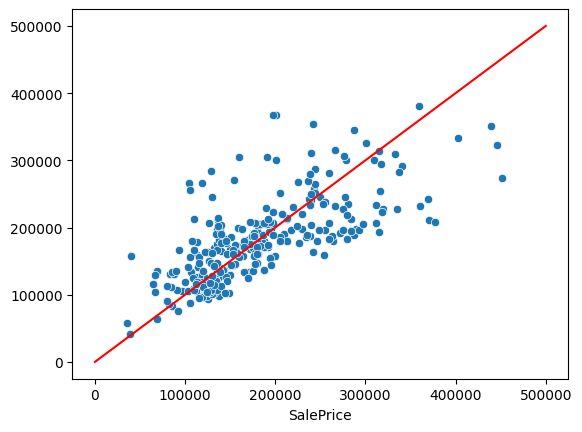

In [61]:
# plot a scatterplot of the predicted value by the real value
x = np.linspace(0, 500000, 100000)
y = x
plt.plot(x, y, color="red")

sns.scatterplot(x=y_test, y=y_pred);

In [62]:
y_train.mean()

180823.59862778732

The case 100% ideal would be $y_i = \hat{y}_i$, which would produce an exact straight line!

The more "spread out" the points around the line, the worse the model is, in general, because it is making more mistakes.

One way to quantify this is through a metric known as **$R^2$**, the **coefficient of determination**.

This coefficient indicates **how close the data is to the fitted line**. On the other hand, $R^2$ represents the percentage of variation in the response that is explained by the model.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$


It is possible to use $R^2$ in the training data, but this is not so significant, due to overfitting, which we will discuss next. More significant is to calculate $R^2$ in the test data as we will do next. This metric is equivalent, therefore, **to the graph we made above**.

In [63]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.49160330551638043

Other important thing is that the residuals are **normally distributed**.

If this is not the case, it is a sign that the model is not adequate to the data, and we should try another model.

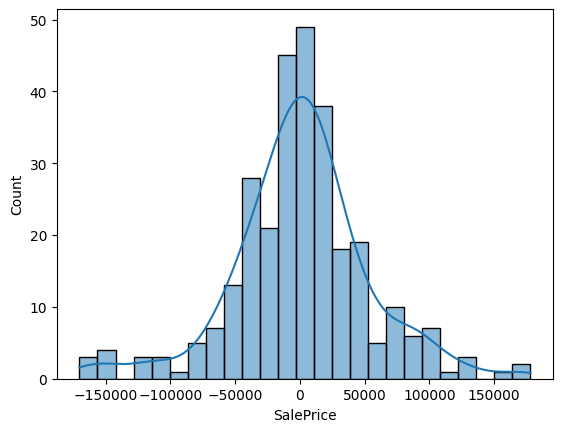

In [64]:
# check the distribution of the residuals
sns.histplot(y_test - y_pred, kde=True);

In [65]:
# import the test
from scipy.stats import shapiro

# make the test
test_stat, p = shapiro(y_test - y_pred)

print("Test Statistic:", test_stat)
print("\np-value:", p)

# interpretation of the test
# level of significance of 5%
alpha = 0.05

if p > alpha:
    print("\nFailer to reject H_0: sample seems to be normal")
else:
    print("\nRejection of H_0: sample is not normal")

Test Statistic: 0.9623034000396729

p-value: 6.902670293129631e-07

Rejection of H_0: sample is not normal


In [66]:
# import the test
from scipy.stats import normaltest
    
# make the test
test_stat, p = normaltest(y_test - y_pred)

print("Test Statistic:", test_stat)
print("\np-value:", p)

# interpretation of the test
# level of significance of 5%
alpha = 0.05

if p > alpha:
    print("\nFailed to reject H_0: sample seems to be normal")
else:
    print("\nRejection of H_0: sample is not normal")

Test Statistic: 15.330540528116952

p-value: 0.0004688300302472293

Rejection of H_0: sample is not normal


Beyond the residuals, there are three main **evaluation metrics** of the linear regression model:

**Mean Absolute Error** (MAE) is the mean of the absolute value of all residuals (errors):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing the metrics:

- **MAE** is the simplest to understand, but it penalizes smaller errors more;
- **MSE** is the most popular metric, because this metric penalizes larger errors more, which makes more sense in real applications.
- **RMSE** is even more popular, because this metric is in the same units as the target.

These metrics can all be used as **cost functions** to be minimized by the estimator algorithm.

In [67]:
from sklearn import metrics

In [68]:
df["SalePrice"].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [69]:
# MAE
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

37694.281757920224

In [70]:
mae / df["SalePrice"].mean()

0.20833291118194502

In [71]:
# MSE
mse = metrics.mean_squared_error(y_test, y_pred)
mse

2808244730.2454395

In [72]:
# RMSE
rmse = np.sqrt(mse)
rmse

52992.874334625776

In [73]:
rmse / df["SalePrice"].mean()

0.29288685888574695

## Multiple linear regression

The model we made above considers a single feature as a predictor of the house price, even though we have 78 other features. Isn't there more useful information in all these other variables?

In general, it is natural that we expect that **more variables** bring **more information** to the model, and therefore make it more precise.

To incorporate these other variables into the model, we can use other **features** (such as the number of rooms, the average income of the neighborhood, etc.), and in this case we will have a **Multiple Linear Regression**, which is expressed by the following hypothesis function:

$$ y = f_{H, \vec{b}} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

In this case, in addition to $b_0$ and $b_1$, we also have other coefficients, one for each of the $n$ features we choose! That is, the parameter vector has $n+1$ dimensions:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1\\
\vdots\\
b_n
\end{bmatrix}$$

Multiple regression models are potentially more accurate, but there is also a downside: we lose the **possibility of visualization**. Now, we no longer have a straight line, but rather a **hyperplane** that relates all the features with the target.

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

Let's build this model?

In [74]:
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   OverallQual    1458 non-null   int64  
 5   OverallCond    1458 non-null   int64  
 6   YearBuilt      1458 non-null   int64  
 7   YearRemodAdd   1458 non-null   int64  
 8   MasVnrArea     1450 non-null   float64
 9   BsmtFinSF1     1458 non-null   int64  
 10  BsmtFinSF2     1458 non-null   int64  
 11  BsmtUnfSF      1458 non-null   int64  
 12  TotalBsmtSF    1458 non-null   int64  
 13  1stFlrSF       1458 non-null   int64  
 14  2ndFlrSF       1458 non-null   int64  
 15  LowQualFinSF   1458 non-null   int64  
 16  GrLivArea      1458 non-null   int64  
 17  BsmtFullBath   1458 non-null   int64  
 18  BsmtHalf

In [75]:
df.select_dtypes(include=[np.number]).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
Log_Price          0
dtype: int64

In [76]:
# select all numeric columns as the X feature variable
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

In [77]:
df.select_dtypes(include=[np.number]).isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
Log_Price        0
dtype: int64

Observation: the column "Id" brings only an arbitrary identification number that should not be correlated with the target. So let's disregard this column from our model.

In [78]:
X = df.drop(columns=["Id", "SalePrice", "Log_Price"])
y = df['SalePrice']

In [79]:
X.columns.tolist()

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [80]:
X.shape

(1458, 33)

Intercept: -355999.7470666283
Angular coeficients: [-1.12585601e+02  4.90238272e-01  1.46756366e+04  5.05565957e+03
  3.94922596e+02  1.34368773e+02  2.59168796e+01 -2.65571175e+00
  6.39940710e-01  2.39011085e+01  2.40115938e+01  2.48670585e+01
 -3.00610179e+00  4.58725506e+01 -6.09458509e+02 -3.72881778e+03
 -1.21068789e+03 -1.90728034e+03 -1.51336961e+04 -1.42179718e+04
  5.49321316e+03  6.06298683e+02  1.34345675e+03  2.08353538e+01
  1.00323546e+01  1.91281980e+01  1.18709828e+00  1.40666977e+01
  2.01493675e+01  5.40145044e+01 -1.96142385e+00 -3.90326342e+02
 -3.75378807e+02]

####################################################



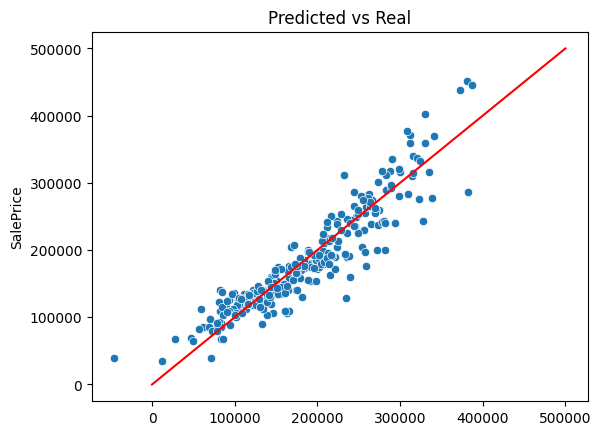

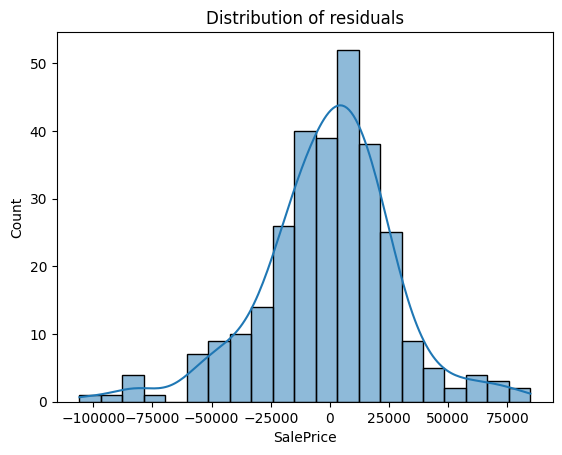


####################################################


Evaluation metrics (test data):

R^2: 0.8563506695017955
MAE: 20734.904154105832
MSE: 793479736.8905119
RMSE: 28168.772371023057


In [81]:
estimator = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
model = estimator.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Angular coeficients:", model.coef_)

print("\n####################################################\n")

# 5)
preds = model.predict(X_test)

plt.title("Predicted vs Real")
sns.scatterplot(x=preds, y=y_test)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Distribution of residuals")
sns.histplot(y_test - preds, kde=True)
plt.show()

print("\n####################################################\n")
print("\nEvaluation metrics (test data):\n")
print('R^2:', metrics.r2_score(y_test, preds))
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Também é possível calcularmos as métricas de performance na base de treino, mas temos que tomar muito cuidado ao interpretar estas medidas!

It is also possible to calculate the performance metrics in the training base, but we have to be very careful when interpreting these measures, due to overfitting.


Train performance



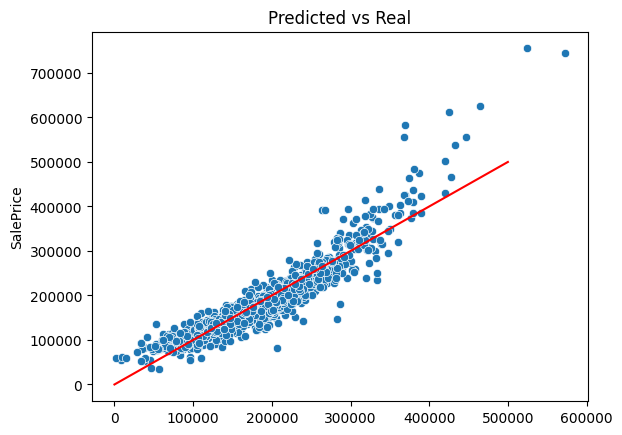

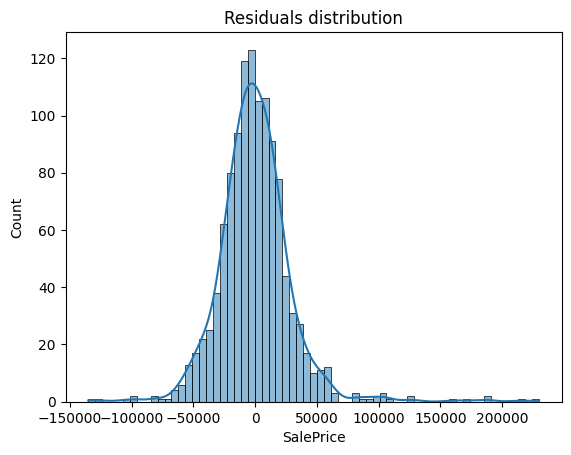


####################################################


Evaluation metrics (train data):

R^2: 0.8616841881921395
MAE: 20508.039034549325
MSE: 900886802.9866577
RMSE: 30014.776410739058


In [82]:
print("\nTrain performance\n")

preds = model.predict(X_train)

plt.title("Predicted vs Real")
sns.scatterplot(x=preds, y=y_train)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Residuals distribution")

sns.histplot(y_train - preds, kde=True)
plt.show()

print("\n####################################################\n")
print("\nEvaluation metrics (train data):\n")

print('R^2:', metrics.r2_score(y_train, preds))
print('MAE:', metrics.mean_absolute_error(y_train, preds))
print('MSE:', metrics.mean_squared_error(y_train, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, preds)))

Comparing:

```
Evaluation metrics (test data):

R^2: 0.8563506695017936
MAE: 20734.90415410572
MSE: 793479736.8905219
RMSE: 28168.772371023235
```

```
Evaluation metrics (training data):

R^2: 0.8616841881921395
MAE: 20508.039034548918
MSE: 900886802.9866579
RMSE: 30014.776410739058
```

Let's look at the model parameters:

In [83]:
model.coef_

array([-1.12585601e+02,  4.90238272e-01,  1.46756366e+04,  5.05565957e+03,
        3.94922596e+02,  1.34368773e+02,  2.59168796e+01, -2.65571175e+00,
        6.39940710e-01,  2.39011085e+01,  2.40115938e+01,  2.48670585e+01,
       -3.00610179e+00,  4.58725506e+01, -6.09458509e+02, -3.72881778e+03,
       -1.21068789e+03, -1.90728034e+03, -1.51336961e+04, -1.42179718e+04,
        5.49321316e+03,  6.06298683e+02,  1.34345675e+03,  2.08353538e+01,
        1.00323546e+01,  1.91281980e+01,  1.18709828e+00,  1.40666977e+01,
        2.01493675e+01,  5.40145044e+01, -1.96142385e+00, -3.90326342e+02,
       -3.75378807e+02])

In [84]:
model.intercept_

-355999.7470666283

In [85]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Parameter value'])
coeff_df

,Parameter value
MSSubClass,-112.585601
LotArea,0.490238
OverallQual,14675.636583
OverallCond,5055.659575
YearBuilt,394.922596
YearRemodAdd,134.368773
BsmtFinSF1,25.916880
BsmtFinSF2,-2.655712
BsmtUnfSF,0.639941
TotalBsmtSF,23.901109


It is possible to interpret the parameters and assign an "importance" of each feature to the value of the respective parameter. But, as we discussed, this analysis is affected by the scale of the features. See:

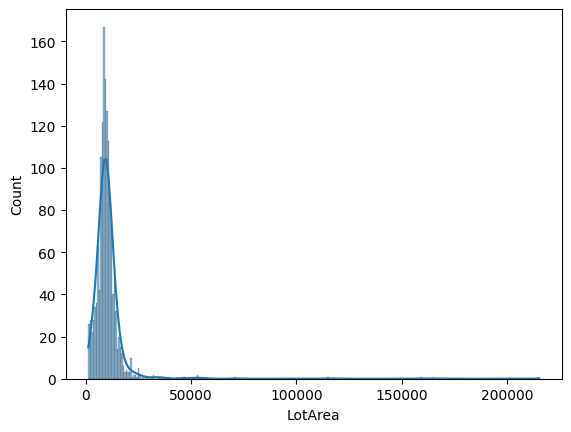

In [86]:
sns.histplot(data=df, x ="LotArea", kde=True);

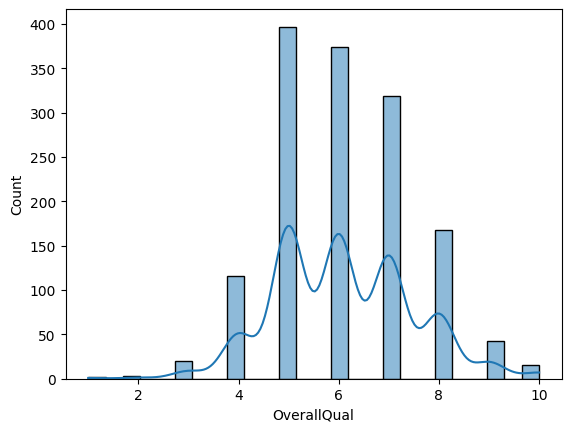

In [87]:
sns.histplot(data=df, x ="OverallQual", kde=True);

In [88]:
df["LotArea"].describe()

count      1458.000000
mean      10459.936900
std        9859.198156
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

In [89]:
df["OverallQual"].describe()

count    1458.000000
mean        6.093964
std         1.376369
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

One way to eliminate the effect of the scale is to **scale the data** (a pre-processing).

This can be seen as a third pass in the cycle.

In [90]:
((df["LotArea"] - df["LotArea"].min())/(df["LotArea"].max() - df["LotArea"].min())).describe()

count    1458.000000
mean        0.042814
std         0.046083
min         0.000000
25%         0.029187
50%         0.038211
75%         0.048143
max         1.000000
Name: LotArea, dtype: float64

Intercept: 1.1358459312875149e+17
Angular coefficients: [-1.91369514e+04  1.01891519e+05  1.24729441e+05  4.26808544e+04
  5.57851750e+04  7.64011385e+03 -2.43314162e+18 -1.25326810e+18
 -2.59772341e+18  3.55852522e+18 -4.91511512e+18 -3.55382098e+18
 -9.84399807e+17  6.94931193e+18 -2.84953580e+03 -9.63621016e+03
 -4.40593893e+03 -3.77225779e+03 -1.20818773e+05 -2.95011460e+04
  6.14340050e+04  2.52745634e+03  6.65078814e+03  2.83833386e+04
  7.89988935e+03  1.04726319e+04  9.47236475e+02  8.95646146e+03
  9.39270902e+03  3.86290661e+04 -3.18334469e+04 -3.13926079e+03
 -1.83107851e+03]

####################################################



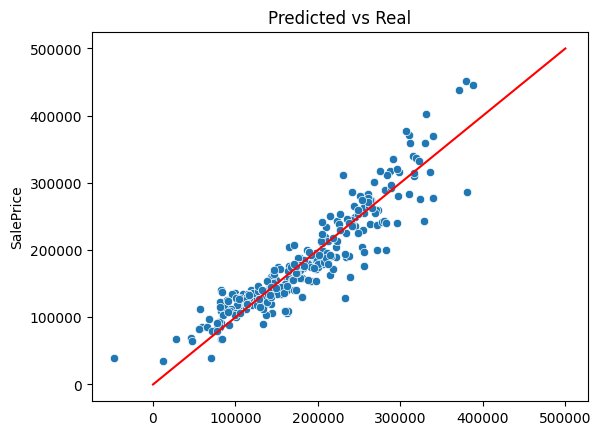

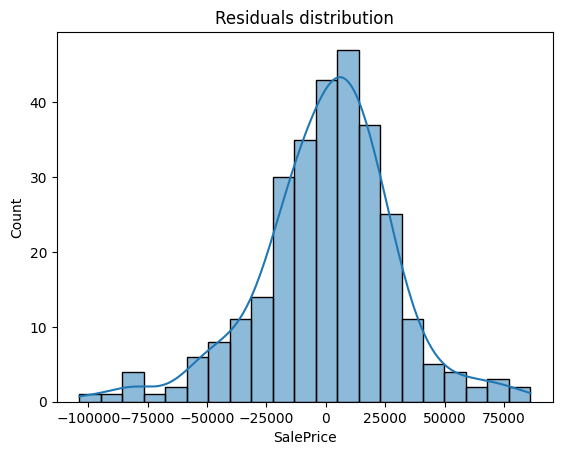


####################################################


Evaluation metrics (test data):

R^2: 0.8550770386162471
MAE: 20995.712328767124
MSE: 800514926.6575342
RMSE: 28293.37248645934


In [91]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice","Log_Price"])
y = df['SalePrice']

estimator = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply the scaler to the data
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# fit and transfort data
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

model = estimator.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Angular coefficients:", model.coef_)

print("\n####################################################\n")

preds = model.predict(X_test)

plt.title("Predicted vs Real")
sns.scatterplot(x=preds, y=y_test)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Residuals distribution")
sns.histplot(y_test - preds, kde=True)
plt.show()

print("\n####################################################\n")

print("\nEvaluation metrics (test data):\n")
print('R^2:', metrics.r2_score(y_test, preds))
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [92]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Parameter value'])
coeff_df

,Parameter value
MSSubClass,-1.913695e+04
LotArea,1.018915e+05
OverallQual,1.247294e+05
OverallCond,4.268085e+04
YearBuilt,5.578517e+04
YearRemodAdd,7.640114e+03
BsmtFinSF1,-2.433142e+18
BsmtFinSF2,-1.253268e+18
BsmtUnfSF,-2.597723e+18
TotalBsmtSF,3.558525e+18


In [93]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values("Parameter value", ascending=False).index

Index(['GrLivArea', '1stFlrSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtUnfSF',
       'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'OverallQual',
       'BedroomAbvGr', 'LotArea', 'TotRmsAbvGrd', 'YearBuilt', 'OverallCond',
       'PoolArea', 'MiscVal', 'KitchenAbvGr', 'GarageArea', 'MSSubClass',
       'OpenPorchSF', 'BsmtHalfBath', 'ScreenPorch', '3SsnPorch', 'WoodDeckSF',
       'YearRemodAdd', 'GarageCars', 'FullBath', 'HalfBath', 'MoSold',
       'BsmtFullBath', 'Fireplaces', 'YrSold', 'EnclosedPorch'],
      dtype='object')

Intercept: 1.347633121302987e+17
Angular coefficients: [-1.94569561e+04  1.06244537e+05  1.30166824e+05  4.69819406e+04
  5.90552793e+04 -1.41786347e+18 -7.30316330e+17 -1.51377014e+18
  2.07365773e+18 -5.83157605e+18 -4.21645817e+18 -1.16794871e+18
  8.24506446e+18 -1.32079105e+05 -3.21973025e+04  6.71611092e+04
  3.58005640e+04  9.04116460e+03  4.37273608e+04 -3.00728986e+04]

####################################################



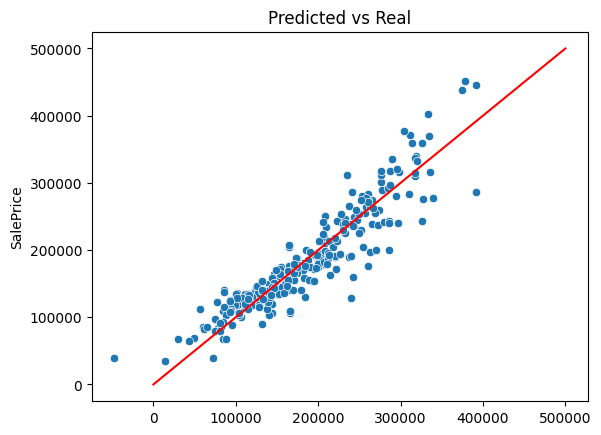

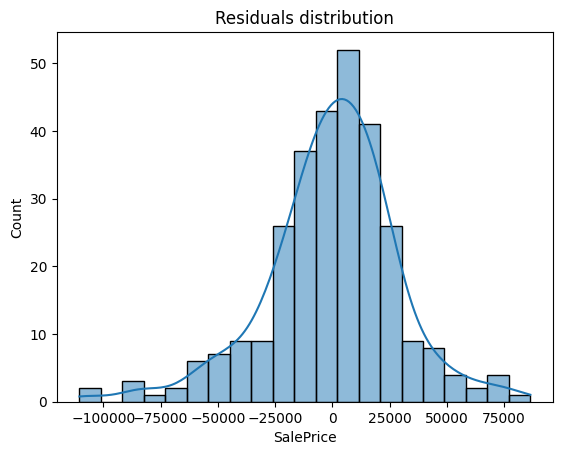


####################################################


Evaluation metrics (test data):

R^2: 0.8506305354618356
MAE: 21060.657534246577
MSE: 825076197.7808219
RMSE: 28724.139635171356


In [94]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice","Log_Price", 
                     'ScreenPorch', 'WoodDeckSF', 'YearRemodAdd', 'BsmtHalfBath',
                     '3SsnPorch', 'GarageCars', 'MoSold', 'HalfBath', 'FullBath',
                     'BsmtFullBath', 'Fireplaces', 'YrSold', 'EnclosedPorch'])
y = df['SalePrice']

estimator = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

model = estimator.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Angular coefficients:", model.coef_)

print("\n####################################################\n")

preds = model.predict(X_test)

plt.title("Predicted vs Real")
sns.scatterplot(x=preds, y=y_test)
plt.plot(np.linspace(0, 500000, 1000), np.linspace(0, 500000, 1000), color="red")
plt.show()

plt.title("Residuals distribution")
sns.histplot(y_test - preds, kde=True)
plt.show()

print("\n####################################################\n")

print("\nEvaluation metrics (test data):\n")
print('R^2:', metrics.r2_score(y_test, preds))
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Did the model performance improve? Can we improve it even more?

Options:
- try only a subset of features: **feature selection**
- use categorical features: **feature engeneering**

## Overfitting

Overfit is one of the most important concepts in machine learning. It happens when the model has 100% accuracy in the training data, but in the test data the performance drops to less than 50%.

This can happen because the model becomes **specialist only in the training set**, not being able to **generalize the patterns beyond the seen data**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

The overfitting is closely related to the concept of **bias** and **variance**:

> **Bias**<br>
Is the difference between what the model predicts, and the correct value to be predicted.<br>
Models with high bias are too simple, so **they cannot capture the relationships that the training data exhibits** (underfit).<br>
This makes both training and test errors high.
<br><br>
In other words:<br>
**Incabable of capturing the true relationship between features and target**


> **Variance**<br>
Variance refers to the variability of a model's predictions.<br>
Models with high variance are too complex, so **they learn too much the relationships exhibited in the training data** (overfit).<br>
This makes training errors low, but test errors high.
<br><br>
In other words:<br>
**Incabable of performing well in other datasets different from the one used in training**.

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

To show overfit being used in a test dataset [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [95]:
df_anscombe = sns.load_dataset('anscombe')

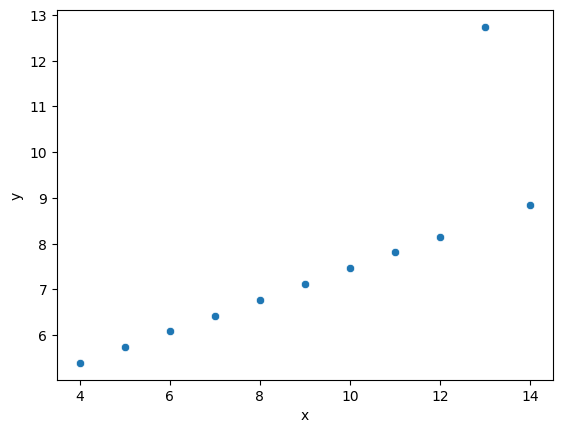

In [96]:
df = df_anscombe[df_anscombe["dataset"] == "III"].copy()
sns.scatterplot(data=df, x='x',y='y');

Let's suppose that this data represents values of measurements of a sensor, but the sensor had a small problem during the measurement.

We can easily see what this error is, and what the regression function for this sensor with the valid data would be: **linear regression**.

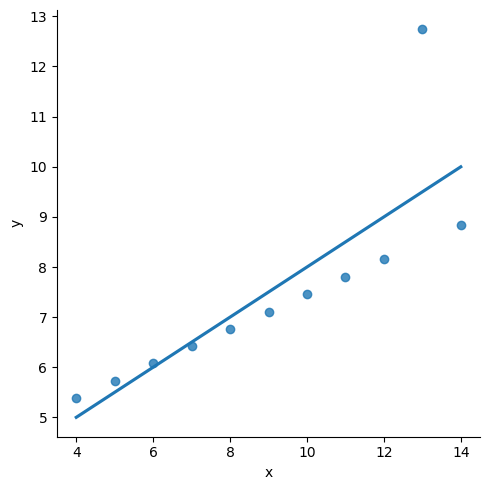

In [97]:
sns.lmplot(data=df, x='x', y='y', ci=False, order=1);

Note that the linear function already finds a pattern very similar to the data, but an error point makes it not have an optimal result.

We could use polynomial regressions, which have orders greater than 1, to try to reduce the error of the regression. For example, we can consider a polynomial of degree 6,

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \cdots + \beta_{6} {x_{i}}^{6}$$

To create polynomial models with sklearn, [take a look here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

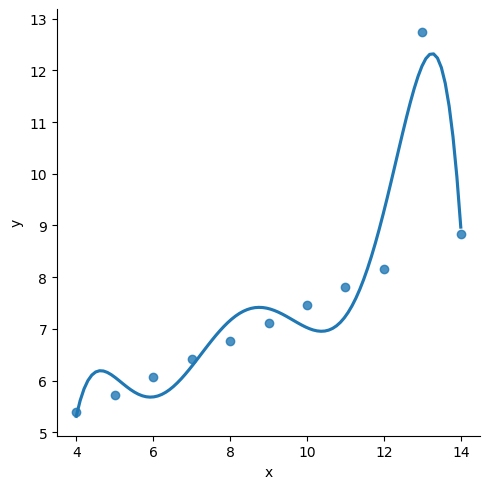

In [98]:
sns.lmplot(data=df, x='x', y='y', order=6, ci=False);

Using a 6th order regression we realize that it adjusts to the value with error, but it **distances itself from the regression that really represents the data**.

This happens because it **overfitted the training data, distancing itself from the real data**.

__How to guarantee that our model is not suffering from overfitting?__

Naturally, this is an extremely important question, especially in the context of **neural networks**. [See here](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) and [here](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) some discussions.

In practice: **never rely on training performance as a way to evaluate the model**. What we always want to optimize is the performance **evaluated on the test data**, that is, the **generalization performance** of the model.

Thus, it is **evaluating the model on the test data** that we guarantee that a good performance is not a product of overfitting.